In [1]:
#!pip3 install statsmodels

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
pd.set_option('future.no_silent_downcasting', True)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os
os.getcwd()

'c:\\Users\\Pavel\\Documents\\Learning\\SDA\\Kaggle_Competition\\House_Price'

In [4]:
df = pd.read_csv('train.csv')
df_kaggle = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [5]:
pd.set_option('display.max_columns', None)
#print(df.head())
print(df.shape)
print(df_kaggle.shape)


(1460, 81)
(1459, 80)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
df[categorical].head()

There are 43 categorical variables


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
# find numerical variables

numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
df[numerical].head()

There are 38 numerical variables


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Preprocessing

In [9]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

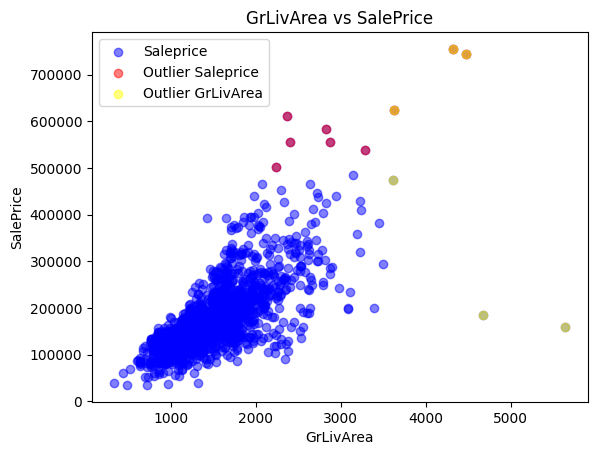

In [10]:
#Plot GrLivArea vs SalePrice https://www.kaggle.com/code/felipefiorini/house-prices-xgboost-outlier-detect
df_oSalePrice = df.query('SalePrice >= 500000')
df_oGrLivAreA = df.query('GrLivArea >= 3500')
plt.scatter(df['GrLivArea'], df['SalePrice'], color='blue', alpha=0.5,label='Saleprice')
plt.scatter(df_oSalePrice['GrLivArea'],   df_oSalePrice['SalePrice'],   color='red',  alpha=0.5, label='Outlier Saleprice')
plt.scatter(df_oGrLivAreA['GrLivArea'],   df_oGrLivAreA['SalePrice'],   color='yellow',  alpha=0.5, label='Outlier GrLivArea')
plt.legend(loc="upper left")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [11]:
#Outliers
outliers_input = pd.DataFrame()

def outlier_shrink(df):
    df = df.select_dtypes(include='number')
    df = df.fillna(0)
    startcnt = df.shape[0]
    df = df.query('SalePrice < 500000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by SalePrice: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotFrontage < 200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotFrontage: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotArea < 60000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('MasVnrArea < 1250')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by MasVnrArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('TotalBsmtSF < 2500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by TotalBsmtSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('YearBuilt > 1880')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by YearBuilt: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LowQualFinSF < 300')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LowQualFinSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GrLivArea < 3000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GrLivArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GarageArea < 1200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GarageArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('PoolArea < 500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by PoolArea: {startcnt - aftercnt}')
    return (df)

outliers_input = outlier_shrink(df)

print("outliers_input shape: ", outliers_input.shape)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

outliers = pd.DataFrame()

def detect_outliers(df):    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))    
    return df[outlier_mask]

# Apply the function to get outliers
numerical = df.select_dtypes(include='number').columns
outliers = pd.DataFrame()

for column in numerical:
    outliers[column] = detect_outliers(df[column])
    
    fig, ax = plt.subplots(figsize=(2, 3))
    outliers_input[[column]].boxplot(ax=ax)  # Only plot the current column
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    plt.title(f'Boxplot for {column}')
    #plt.show()
    plt.close()
# Display the outliers
#print(outliers)

outliers_input = outliers_input.iloc[:,[0]] #ponecháme jen index pro budoucí merge
outliers_input.rename(columns = {'Id':'index'}, inplace = True) #a přejmenujeme na index


Row start: 1460 end: 1451 decrease by SalePrice: 9
Row start: 1451 end: 1449 decrease by LotFrontage: 2
Row start: 1449 end: 1444 decrease by LotArea: 5
Row start: 1444 end: 1443 decrease by MasVnrArea: 1
Row start: 1443 end: 1438 decrease by TotalBsmtSF: 5
Row start: 1438 end: 1432 decrease by YearBuilt: 6
Row start: 1432 end: 1416 decrease by LowQualFinSF: 16
Row start: 1416 end: 1411 decrease by GrLivArea: 5
Row start: 1411 end: 1407 decrease by GarageArea: 4
Row start: 1407 end: 1403 decrease by PoolArea: 4
outliers_input shape:  (1403, 38)


In [12]:
pd.options.mode.copy_on_write = True #odstranění warningu
y = df[['Id', 'SalePrice']]
y['Id'] = y['Id'] -1 
y.rename(columns = {'Id':'index'}, inplace = True)
new_submission = df_kaggle[["Id"]] #Uložení Id bokem
new_submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [13]:
#zpracovává jak df, tak df_kaggle, doporučení je rozšiřovat tuto funkci o preprocessingové parametry tak, aby se jak train, tak test zpracovávaly shodným způsobem
def preproces_data(x):
  x_output = x
  for var in ['Id', 'SalePrice']:
    if var in x_output.columns:
      x_output.drop(var, inplace=True, axis =1) #dropne se Id a Saleprice pokud je ve sloupcích

  x_output['MasVnrArea'] = x_output['MasVnrArea'].fillna(0)
  x_output['BsmtFinSF1'] = x_output['BsmtFinSF1'].fillna(0)
  x_output['BsmtFinSF2'] = x_output['BsmtFinSF2'].fillna(0)
  x_output['BsmtUnfSF'] = x_output['BsmtUnfSF'].fillna(0)
  x_output['TotalBsmtSF'] = x_output['TotalBsmtSF'].fillna(0).astype(float)
  x_output['MSZoning'] = x_output['MSZoning'].fillna('RL')
  x_output['ExterQual'] = x_output['ExterQual'].fillna('TA')
  x_output['HouseStyle'] = x_output['HouseStyle'].fillna('1Story')
  x_output['BsmtCond'] = x_output['BsmtCond'].fillna('Po')
  x_output['KitchenQual'] = x_output['KitchenQual'].fillna('TA')
  x_output['GarageQual'] = x_output['GarageQual'].fillna('NA')
  x_output['Fence'] = x_output['Fence'].fillna('NA')
  x_output['FireplaceQu'] = x_output['FireplaceQu'].fillna('NAN')
  x_output['LotFrontage'] = x_output['LotFrontage'].fillna(0).astype(float) #x_output['LotFrontage'].mean() - vyzkoušet případně dopad
  x_output['OpenPorchSF'] = x_output['OpenPorchSF'].fillna(0).astype(float)
  x_output['EnclosedPorch'] = x_output['EnclosedPorch'].fillna(0).astype(float)
  x_output['3SsnPorch'] = x_output['3SsnPorch'].fillna(0).astype(float)
  x_output['ScreenPorch'] = x_output['ScreenPorch'].fillna(0).astype(float)
  x_output['GarageYrBlt'] = x_output['GarageYrBlt'].fillna(0)
  x_output['LotArea'] = x_output['LotArea'].fillna(0)
  x_output['GarageCars'] = x_output['GarageCars'].fillna(0)
  x_output['GarageArea'] = x_output['GarageArea'].fillna(0)
  x_output['BsmtHalfBath'] = x_output['BsmtHalfBath'].fillna(0)
  #x_output['GrLivArea^2'] = x_output['GrLivArea'] ** 2 

  X_input = x_output
  X_input = x_output.fillna(0)

  x_output = pd.get_dummies(X_input, drop_first = True) #Transformace kategoriálních resp. sloupců typu "object" na sloupce s názvem sloupec+hodnota 

  X_input = x_output
  x_output = X_input.fillna(0)
  
  x_output = x_output.replace({True: 1, False: 0}).astype(int) #nahrazení True False hodnot vytvořených get_dummies za čísla pro funkčnost výpočtu p.value

  return(x_output)

In [14]:
#spojení train i test tak, aby výsledný dataset obsahoval stejné sloupce vytvořené get_dummies
df_complet = pd.concat([df, df_kaggle])
#zresetování indexu
df_complet = df_complet.reset_index(drop=True).reset_index()
print(f"df shape         : {df.shape}")
print(f"df_kaggle shape  : {df_kaggle.shape}")
print(f"df complet       : {df_complet.shape}")

df shape         : (1460, 81)
df_kaggle shape  : (1459, 80)
df complet       : (2919, 82)


In [15]:
#preprocessing dat
X_complet = preproces_data(df_complet)
print(f"df_complet shape: {X_complet.shape}") #269 columns

df_complet shape: (2919, 265)


In [16]:
X_complet.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NAN,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,S

In [17]:
#Rozdělení dat zpět na dataframes X a X_kaggle
X = pd.DataFrame()
X_kaggle = pd.DataFrame()
X = X_complet.loc[0:1459,:] # Vložíme 0 .. 1459 řádků a všechny sloupce
X_kaggle = X_complet.loc[1460:,:] # Vložíme 0 .. 1459 řádků a všechny sloupce
print(f"X shape              : {X.shape}")
print(f"X kaggle shape       : {X_kaggle.shape}")
#Ořízneme outliery v X
X = pd.merge(outliers_input, X)
y = pd.merge(outliers_input, y)
X.reset_index(drop=True).reset_index() #a protože pár řádků vypadlo, nastavíme znovu index
y.reset_index(drop=True).reset_index() #a protože pár řádků vypadlo, nastavíme znovu index
y = y.drop(columns=['index'])
print(f"X without outlier    : {X.shape}")
print(f"y                    : {y.shape}")
print(f"y                    : {y.shape}")

#Null hodnoty přes všechny slopce dataframe
print("X_complet          NaN: ", X_complet.isnull().sum().sum())
print("X                  NaN: ", X.isnull().sum().sum())
print("X_kaggle           NaN: ", X_kaggle.isnull().sum().sum())
#X.head()

X shape              : (1460, 265)
X kaggle shape       : (1459, 265)
X without outlier    : (1402, 265)
y                    : (1402, 1)
y                    : (1402, 1)
X_complet          NaN:  0
X                  NaN:  0
X_kaggle           NaN:  0


In [18]:
#y.head(5)

In [164]:
#X.head(100)

In [165]:
#První výběr columns podle p-value, které budeme dále zkoumat
X = sm.add_constant(X)
X.index = y.index
model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p_value'])
p_values_df = p_values_df.sort_values(by='p_value', ascending=False) #největší p-value má nejmenší vliv na kvalitu predikce
print(p_values_df)
#můžeme v cyklu přidávat proměnné s nejmenší p-value a sledovat mean error nebo mean log error a tak postupovat,
#dokud se error zlepšuje nebo naopak odebírat jednu proměnnou po druhé a zjišťovat, odebrání které má nejhorší dopad na mean error

                            p_value
Exterior1st_AsphShn    9.997220e-01
PavedDrive_Y           9.756631e-01
Neighborhood_Veenker   9.658532e-01
GarageCond_Ex          9.617520e-01
HeatingQC_Fa           9.465618e-01
CentralAir_Y           9.427737e-01
Exterior2nd_Other      9.402692e-01
HouseStyle_SFoyer      9.369615e-01
Fence_MnWw             9.216534e-01
Heating_Grav           9.105055e-01
SaleCondition_Partial  9.095756e-01
Heating_GasW           8.991554e-01
Condition2_Norm        8.900163e-01
Neighborhood_BrDale    8.893661e-01
HeatingQC_Po           8.879466e-01
LotFrontage            8.570560e-01
Condition2_RRNn        8.475326e-01
GarageQual_NA          8.388767e-01
FireplaceQu_NAN        8.342141e-01
Condition2_Feedr       8.240327e-01
RoofStyle_Gambrel      7.945922e-01
BldgType_2fmCon        7.864092e-01
RoofStyle_Gable        7.843082e-01
RoofStyle_Hip          7.794934e-01
Heating_OthW           7.773625e-01
BsmtHalfBath           7.723007e-01
BsmtExposure_No        7.526

In [166]:
p_values_df_sel = p_values_df.query('p_value <= 0.01') #Výběr sloupců, kterými se budeme nadále zabývat
print("Selected: ",p_values_df_sel.shape)
rows_to_retain = p_values_df.index.difference(p_values_df_sel.index)
p_values_df_notsel = p_values_df.loc[list(rows_to_retain)] #Sloupce, které případně zahodíme
print("Not selected: ",p_values_df_notsel.shape)
#display(p_values_df)

Selected:  (42, 1)
Not selected:  (224, 1)


In [167]:
index_values = p_values_df_sel.index.tolist()
p_values_df_sel_col = pd.DataFrame()
p_values_df_sel_col.index = index_values
#p_values_df_sel_col['Column'] = index_values
print("Vybraná podmnožina sloupců pro další zkoumání: \n", p_values_df_sel_col)
print(len(p_values_df_sel_col))

Vybraná podmnožina sloupců pro další zkoumání: 
 Empty DataFrame
Columns: []
Index: [Neighborhood_NoRidge, WoodDeckSF, GarageArea, RoofStyle_Shed, Condition1_Norm, Neighborhood_Edwards, KitchenQual_Fa, GarageQual_Po, ScreenPorch, GarageQual_Gd, RoofMatl_Membran, GarageQual_TA, RoofMatl_Metal, Street_Pave, RoofMatl_WdShngl, MasVnrArea, GarageQual_Fa, LandSlope_Sev, RoofMatl_Tar&Grv, RoofMatl_CompShg, RoofMatl_Roll, RoofMatl_WdShake, YearBuilt, ExterQual_TA, TotalBsmtSF, ExterQual_Gd, 2ndFlrSF, Neighborhood_StoneBr, BsmtFinSF1, KitchenQual_TA, GrLivArea, OverallCond, OverallQual, ExterCond_Po, MiscFeature_TenC, KitchenQual_Gd, PoolQC_Ex, PoolQC_Gd, PoolQC_Fa, PoolArea, LotArea, Condition2_PosN]
42


In [168]:
#Šelmostroj vygenerovaný chatgpt, který vybere z množiny sloupců podmnožinu s nejlepším MSE v tomto případě z podmnožiny sloupců dle p-value
# Function to evaluate model and get mean squared error
columns = []
def evaluate_model(features):
    X_with_const = sm.add_constant(features)
    model = sm.OLS(y, X_with_const).fit()
    predictions = model.predict(X_with_const)
    mse = mean_squared_error(y, predictions)
    return mse, model.pvalues

# Initial empty set of features
selected_features = []
remaining_features = list(p_values_df_sel_col.index)

# Track the improvement in model error
best_mse = float('inf')
sel_feature_cnt  = 0
iteration_cnt = 0

while remaining_features and len(p_values_df_sel_col) > iteration_cnt:        
    p_values_dict = {}
    mse_dict = {}
    iteration_cnt += 1
    # Evaluate each feature not yet selected
    for feature in remaining_features:
        features_to_evaluate = selected_features + [feature]
        mse, p_values = evaluate_model(X[features_to_evaluate])
        p_values_dict[feature] = p_values
        mse_dict[feature] = mse

    # Select the feature that gives the best improvement in MSE
    best_feature = min(mse_dict, key=mse_dict.get)
    best_feature_mse = mse_dict[best_feature]

    # Check if the new model is better
    if best_feature_mse < best_mse:
        best_mse = best_feature_mse
        selected_features.append(best_feature)
        sel_feature_cnt += 1
        remaining_features.remove(best_feature)
        print(f"best_feature append: {best_feature}  ME: {np.sqrt(best_feature_mse)} Selected feature count: {sel_feature_cnt}")        
    else:
        # If no improvement, break the loop
        #break
        pass

# Final model with selected features
final_mse, final_p_values = evaluate_model(X[selected_features])
final_p_values_df = pd.DataFrame(final_p_values, columns=['p-value'])

# Display the final p-values and selected features
print(f"Selected features: {selected_features}")
print(f"Final model ME: {np.sqrt(best_mse)}")
print(final_p_values_df)


best_feature append: OverallQual  ME: 48815.55705109289 Selected feature count: 1
best_feature append: GrLivArea  ME: 42690.76730411572 Selected feature count: 2
best_feature append: BsmtFinSF1  ME: 40335.146051513155 Selected feature count: 3
best_feature append: GarageArea  ME: 39019.21627603299 Selected feature count: 4
best_feature append: PoolQC_Gd  ME: 38027.5622512277 Selected feature count: 5
best_feature append: ExterQual_TA  ME: 37332.49282673384 Selected feature count: 6
best_feature append: ExterQual_Gd  ME: 36552.4968957765 Selected feature count: 7
best_feature append: Condition2_PosN  ME: 35712.2628800947 Selected feature count: 8
best_feature append: LotArea  ME: 35118.88866744425 Selected feature count: 9
best_feature append: YearBuilt  ME: 34554.21959730381 Selected feature count: 10
best_feature append: OverallCond  ME: 33945.6819301402 Selected feature count: 11
best_feature append: TotalBsmtSF  ME: 33534.31307208884 Selected feature count: 12
best_feature append: N

In [169]:
selected_features

['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageArea',
 'PoolQC_Gd',
 'ExterQual_TA',
 'ExterQual_Gd',
 'Condition2_PosN',
 'LotArea',
 'YearBuilt',
 'OverallCond',
 'TotalBsmtSF',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'RoofMatl_WdShngl',
 'PoolArea',
 'PoolQC_Fa',
 'PoolQC_Ex',
 'MiscFeature_TenC',
 'Street_Pave',
 'Condition1_Norm',
 'MasVnrArea',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'KitchenQual_Fa',
 'ScreenPorch',
 'LandSlope_Sev',
 'RoofMatl_Membran',
 'GarageQual_TA',
 'RoofMatl_Metal',
 'WoodDeckSF',
 'RoofMatl_Tar&Grv',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'Neighborhood_Edwards',
 'RoofStyle_Shed',
 'RoofMatl_Roll',
 'RoofMatl_WdShake',
 'RoofMatl_CompShg',
 '2ndFlrSF']

In [170]:
#Vybraná podmnožina sloupců, pokud je šelmostroj spuštěn na omezené sadě sloupců dle p-value, běh 19s, ME 23967
#['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'YearRemodAdd', 'LotArea', 'Condition2_PosN', 'PoolQC_Gd', 'TotalBsmtSF', 'RoofMatl_WdShngl', 'KitchenAbvGr', 'MSZoning_RM', 'PoolArea', 'PoolQC_Fa', 'PoolQC_Ex', 'BsmtCond_Po', 'OverallCond', 'YearBuilt', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BedroomAbvGr', 'TotRmsAbvGrd', 'MSZoning_FV', 'ScreenPorch', 'MasVnrArea', 'Neighborhood_NWAmes', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'Fireplaces', 'Condition1_Norm', 'Neighborhood_NAmes', 'Neighborhood_Edwards', 'LowQualFinSF', 'RoofMatl_CompShg', 'LandSlope_Mod', 'LotConfig_CulDSac', 'Street_Pave', 'Condition1_RRAe', 'Neighborhood_Mitchel', 'FullBath', 'ExterQual_Gd', 'ExterQual_TA', 'Condition1_RRAn', 'GarageQual_TA', 'GarageQual_Fa', 'HeatingQC_Gd', 'RoofMatl_Membran', 'LandContour_Low', 'RoofMatl_WdShake', 'RoofMatl_Tar&Grv', 'RoofMatl_Metal', 'RoofMatl_Roll', 'LandSlope_Sev', 'GarageArea', 'Foundation_Wood', 'MSZoning_RL', 'MSZoning_RH', 'SaleCondition_Normal', '1stFlrSF', 'HouseStyle_2Story', 'Condition1_PosN', 'GarageQual_Po', 'Condition2_RRAe', 'RoofStyle_Shed', 'WoodDeckSF', 'Fence_NA', 'Fence_MnPrv', 'GarageQual_Gd', 'MoSold', 'LotConfig_FR2', '2ndFlrSF']
X = X.drop(columns=['const']) #odstraníme sloupec const, aby souhlasily features

In [171]:
#Vybraná podmnožina sloupců, pokud je šelmostroj spuštěn na kompletní sadě sloupců běh 29 minut ME 20521
final_col_sel_all = ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'Condition2_PosN', 'YearBuilt', 'BsmtExposure_Gd', 'OverallCond', 'PoolQC_Gd', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Neighborhood_Crawfor', 'SaleType_New', 'LotArea', 'PoolArea', 'PoolQC_Fa', 'PoolQC_Ex', 'MiscFeature_TenC', 'Neighborhood_Somerst', 'SaleCondition_Normal', 'Condition1_Norm', 'Exterior1st_BrkFace', 'BsmtExposure_Av', 'Functional_Typ', 'BedroomAbvGr', 'BldgType_2fmCon', 'Exterior1st_CemntBd', 'MasVnrArea', 'Neighborhood_BrkSide', 'RoofMatl_CompShg', 'ScreenPorch', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BsmtFullBath', 'LotConfig_CulDSac', 'GarageCond_Gd', 'TotalBsmtSF', 'Condition2_PosA', 'MasVnrType_BrkFace', 'FireplaceQu_Po', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'FullBath', 'Street_Pave', 'LowQualFinSF', 'RoofMatl_Membran', 'RoofMatl_WdShake', 'LotShape_Ir2', 'BsmtFinType1_GLQ', 'WoodDeckSF', 'BsmtFinType2_ALQ', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_Roll', 'LandSlope_Sev', 'Neighborhood_Mitchel', 'GarageQual_NA', 'MasVnrType_BrkCmn', 'Neighborhood_NWAmes', 'GarageArea', 'Fireplaces', 'FireplaceQu_NAN', 'BsmtCond_Po', '2ndFlrSF', 'SaleType_Con', 'Neighborhood_Edwards', 'Heating_OthW', 'Foundation_Wood', 'Condition1_RRAe', 'Neighborhood_NAmes', 'MSZoning_RM', 'LandContour_Low', 'Exterior2nd_Plywood', 'Utilities_NoSeWa', 'YearRemodAdd', 'LandSlope_Mod', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_TA', 'Functional_Sev', 'HeatingQC_Gd', 'HeatingQC_TA', 'GarageFinish_RFn', 'LotConfig_FR2', '3SsnPorch', 'GarageType_2Types', 'MoSold', 'SaleCondition_AdjLand', 'ExterQual_Fa', 'HouseStyle_SLvl', 'SaleType_ConLD', 'Neighborhood_SawyerW', 'Neighborhood_NPkVill', 'BsmtFinType1_BLQ', 'Exterior2nd_Other', 'SaleType_CWD', 'RoofStyle_Mansard', 'BsmtQual_Gd', 'Functional_Min2', 'BsmtFinType2_GLQ', 'Exterior2nd_Stone', 'Exterior2nd_HdBoard', 'BsmtExposure_Mn', 'FireplaceQu_TA', 'ExterCond_Gd', 'GarageQual_Fa', 'LotShape_Ir1', 'Condition1_RRAn', 'HouseStyle_1.5Unf', 'Heating_Grav', 'BsmtFinType1_Unf', 'RoofStyle_Shed', 'Condition2_RRAe', 'GarageType_Attchd', 'BsmtExposure_No', 'GarageQual_Po', 'GarageQual_TA', 'GarageQual_Gd', 'GarageCond_Ex', 'Neighborhood_Veenker', 'Condition1_PosN', 'MSZoning_RL', 'MSZoning_FV', 'MSZoning_RH', 'Condition1_Feedr', 'Condition1_PosA', 'Fence_MnPrv', 'Fence_NA', 'Fence_GdWo', 'Exterior2nd_Wd Shng', 'HouseStyle_2.5Fin', 'Functional_Min1', 'Electrical_SBrkr', 'LotConfig_FR3', 'Condition1_RRNn', 'FireplaceQu_Gd', 'Foundation_Stone', 'YrSold', 'Exterior2nd_BrkFace', 'BldgType_Twnhs', 'Neighborhood_BrDale', 'Neighborhood_Blueste', 'LandContour_Lvl', 'LandContour_HLS', 'HouseStyle_2Story', 'Neighborhood_ClearCr', 'BsmtFinType2_LwQ', 'BsmtUnfSF', 'BsmtFinType2_Unf', 'BsmtFinType1_LwQ', 'HouseStyle_2.5Unf', 'Foundation_Slab', 'Heating_Wall', 'MiscFeature_Othr', 'BsmtQual_Fa', 'BldgType_TwnhsE', 'BldgType_Duplex', 'HouseStyle_1Story', 'Neighborhood_OldTown', 'Exterior1st_MetalSd', 'LotConfig_Inside', 'BsmtFinType2_Rec', 'BsmtFinType2_BLQ', 'Electrical_Mix', 'MiscFeature_Shed', 'index', 'Heating_GasA', 'Exterior2nd_MetalSd', 'GarageYrBlt', 'Exterior1st_AsphShn', 'Exterior1st_Wd Sdng', 'HalfBath', 'PavedDrive_P', 'Foundation_PConc', 'Foundation_CBlock', 'Condition2_Norm', 'Condition2_RRAn', 'GarageType_BuiltIn', 'MasVnrType_Stone', 'BsmtQual_TA', 'Exterior1st_CBlock', 'Exterior2nd_ImStucc', 'Exterior1st_Stone', 'Fence_MnWw', 'Exterior1st_WdShing', 'RoofStyle_Gambrel', 'GarageCond_Fa', 'SaleType_WD', 'SaleType_COD', 'Neighborhood_Gilbert', 'Neighborhood_CollgCr', 'Neighborhood_Sawyer', 'Neighborhood_Timber', 'Neighborhood_IDOTRR', 'Neighborhood_SWISU', 'Neighborhood_MeadowV', 'Functional_Maj1', 'Exterior1st_ImStucc', 'Alley_Grvl', 'LotFrontage', 'ExterCond_Po', 'LotShape_Ir3', 'GarageType_Detchd', 'Exterior1st_Plywood', 'Exterior2nd_Wd Sdng', 'Exterior1st_HdBoard', 'Exterior2nd_CmentBd', 'Electrical_FuseP', 'Exterior1st_AsbShng', 'Exterior2nd_AsbShng', 'ExterCond_TA', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'SaleType_ConLw', 'GarageFinish_Fin', 'GarageCond_TA', 'Heating_GasW', 'EnclosedPorch', 'Exterior2nd_AsphShn', 'Functional_Maj2', 'Condition2_Feedr', 'Condition1_RRNe', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_Stucco', 'SaleCondition_Family', 'BsmtHalfBath', 'ExterCond_Fa', 'HeatingQC_Fa', 'SaleType_Oth', 'Alley_Pave', 'Electrical_FuseA', 'Electrical_FuseF', 'SaleCondition_Alloca', 'FireplaceQu_Fa', 'GarageType_CarPort', 'PavedDrive_Y', 'HeatingQC_Po', 'Condition2_RRNn', 'OpenPorchSF', 'Exterior2nd_Brk Cmn', 'CentralAir_Y', 'BsmtFinType1_Rec', 'MiscVal', 'SaleCondition_Partial', 'MiscFeature_Gar2', 'BsmtCond_Gd', 'GarageType_Basment']
final_col_sel = selected_features
#Z X vyhodíme sloupce s kterými dále nebudeme pracovat
X_restricted = pd.DataFrame()
X_restricted = X[selected_features]
#X_restricted = X
X_restricted.shape
X = X_restricted
#A protože máme jiný set sloupců, musíme modifikovat i X_kaggle, resp validační data
X_restricted = pd.DataFrame()
X_restricted = X_kaggle[selected_features]
#X_restricted = X_kaggle
X_restricted.shape
X_kaggle = X_restricted
print(X.shape)
print(X_kaggle.shape)
  

(1402, 41)
(1459, 41)


In [172]:
X.head()


,OverallQual,GrLivArea,BsmtFinSF1,GarageArea,PoolQC_Gd,ExterQual_TA,ExterQual_Gd,Condition2_PosN,LotArea,YearBuilt,OverallCond,TotalBsmtSF,Neighborhood_NoRidge,Neighborhood_StoneBr,RoofMatl_WdShngl,PoolArea,PoolQC_Fa,PoolQC_Ex,MiscFeature_TenC,Street_Pave,Condition1_Norm,MasVnrArea,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Fa,ScreenPorch,LandSlope_Sev,RoofMatl_Membran,GarageQual_TA,RoofMatl_Metal,WoodDeckSF,RoofMatl_Tar&Grv,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Neighborhood_Edwards,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_CompShg,2ndFlrSF
0,6,1262,978,460,0,1,0,0,9600,1976,8,1262,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,298,0,0,0,0,0,0,0,0,1,0
1,7,1786,486,608,0,0,1,0,11250,2001,5,920,0,0,0,0,0,0,0,1,1,162,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,866
2,7,1717,216,642,0,1,0,0,9550,1915,5,756,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,756
3,8,2198,655,836,0,0,1,0,14260,2000,5,1145,1,0,0,0,0,0,0,1,1,350,0,1,0,0,0,0,1,0,192,0,0,0,0,0,0,0,0,1,1053
4,5,1362,732,480,0,1,0,0,14115,1993,5,796,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,40,0,0,0,0,0,0,0,0,1,566


# Modelling

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# Add a constant to the model (intercept)


In [179]:
m_linearreg = LinearRegression()
m_linearreg.fit(X_train,y_train)
print("Model Train Score:             ", round(m_linearreg.score(X_train, y_train), 5))
print("Model Test Score:              ", round(m_linearreg.score(X_test, y_test), 5))

y_pred = m_linearreg.predict(X_test)

# if prediction is negative:
print(root_mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test)))#ošetření případného záporného logaritmu
print(root_mean_squared_error(np.log(y_pred), np.log(y_test)))  #pokud vyjde záporně, může spadnout na chybu logaritmu, je to odhad chyby tak, jak ji vyhodnocuje kaggle
me = root_mean_squared_error(y_pred, y_test)
print(me)

Model Train Score:              0.88536
Model Test Score:               0.65208
0.19091402790241727
0.19091402790241727
49379.570153709334


(1402, 1)
(1402, 41)


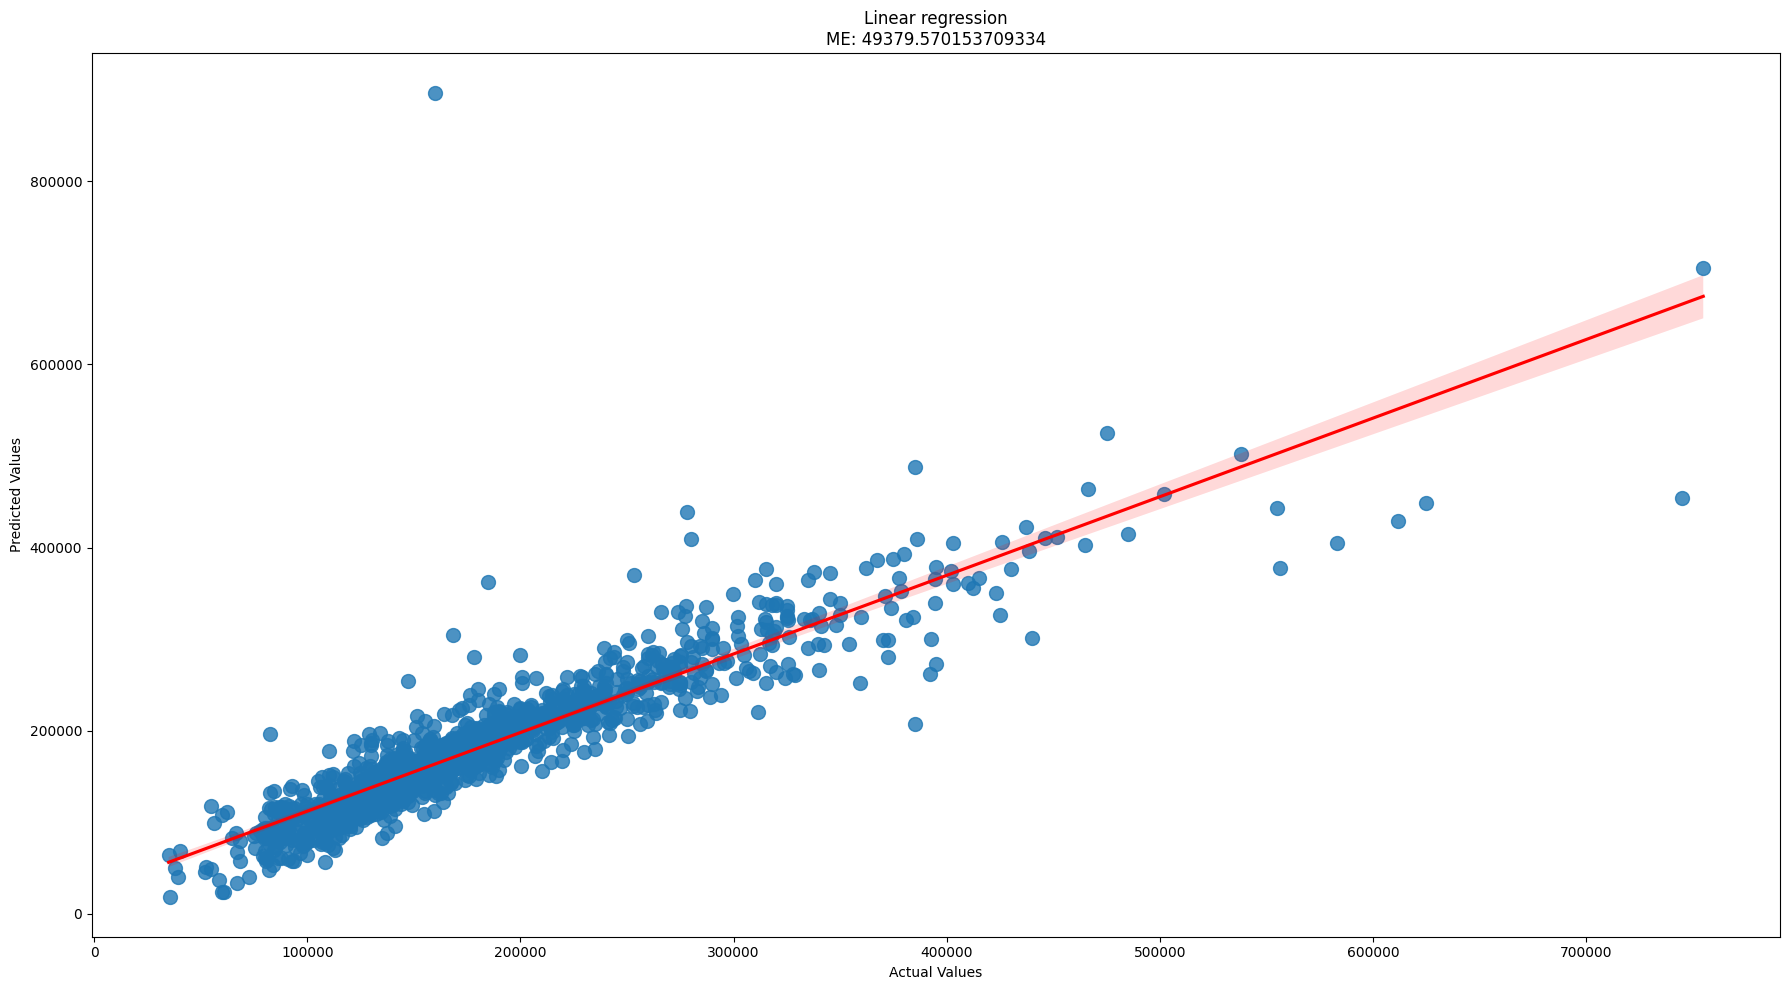

In [180]:
#Graf lineární regrese
y_pred_all = m_linearreg.predict(X) #predikce pro všechna vstupní data bez splitu
print(y_pred_all.shape)
print(X.shape)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax = axes
sns.regplot(x=y, y=y_pred_all, ax=ax, scatter_kws={'s':100}, line_kws={'color':'red'})
ax.set_title(f'Linear regression\nME: {me}')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

In [515]:
from sklearn import preprocessing
from sklearn import config_context
scaler = preprocessing.StandardScaler()
with config_context(transform_output="pandas"):
  X_scaled = scaler.fit_transform(X)
  y_scaled = pd.DataFrame()
  y_scaled = scaler.fit_transform(y)
m_linregscaled = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)
m_linregscaled.fit(X_train,y_train)


LinearRegression()

In [516]:
y_pred = m_linregscaled.predict(X_test)

# if prediction is negative:
print(root_mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test)))#ošetření případného záporného logaritmu

#print(mean_squared_error(np.log(y_pred), np.log(y_test), squared = False))  #pokud vyjde záporně, může spadnout na chybu logaritmu, je to odhad chyby tak, jak ji vyhodnocuje kaggle
me = np.sqrt(root_mean_squared_error(y_pred, y_test))
print(me)

1.975592726384864
41777349.079806425


(1402, 1)
(1402, 266)


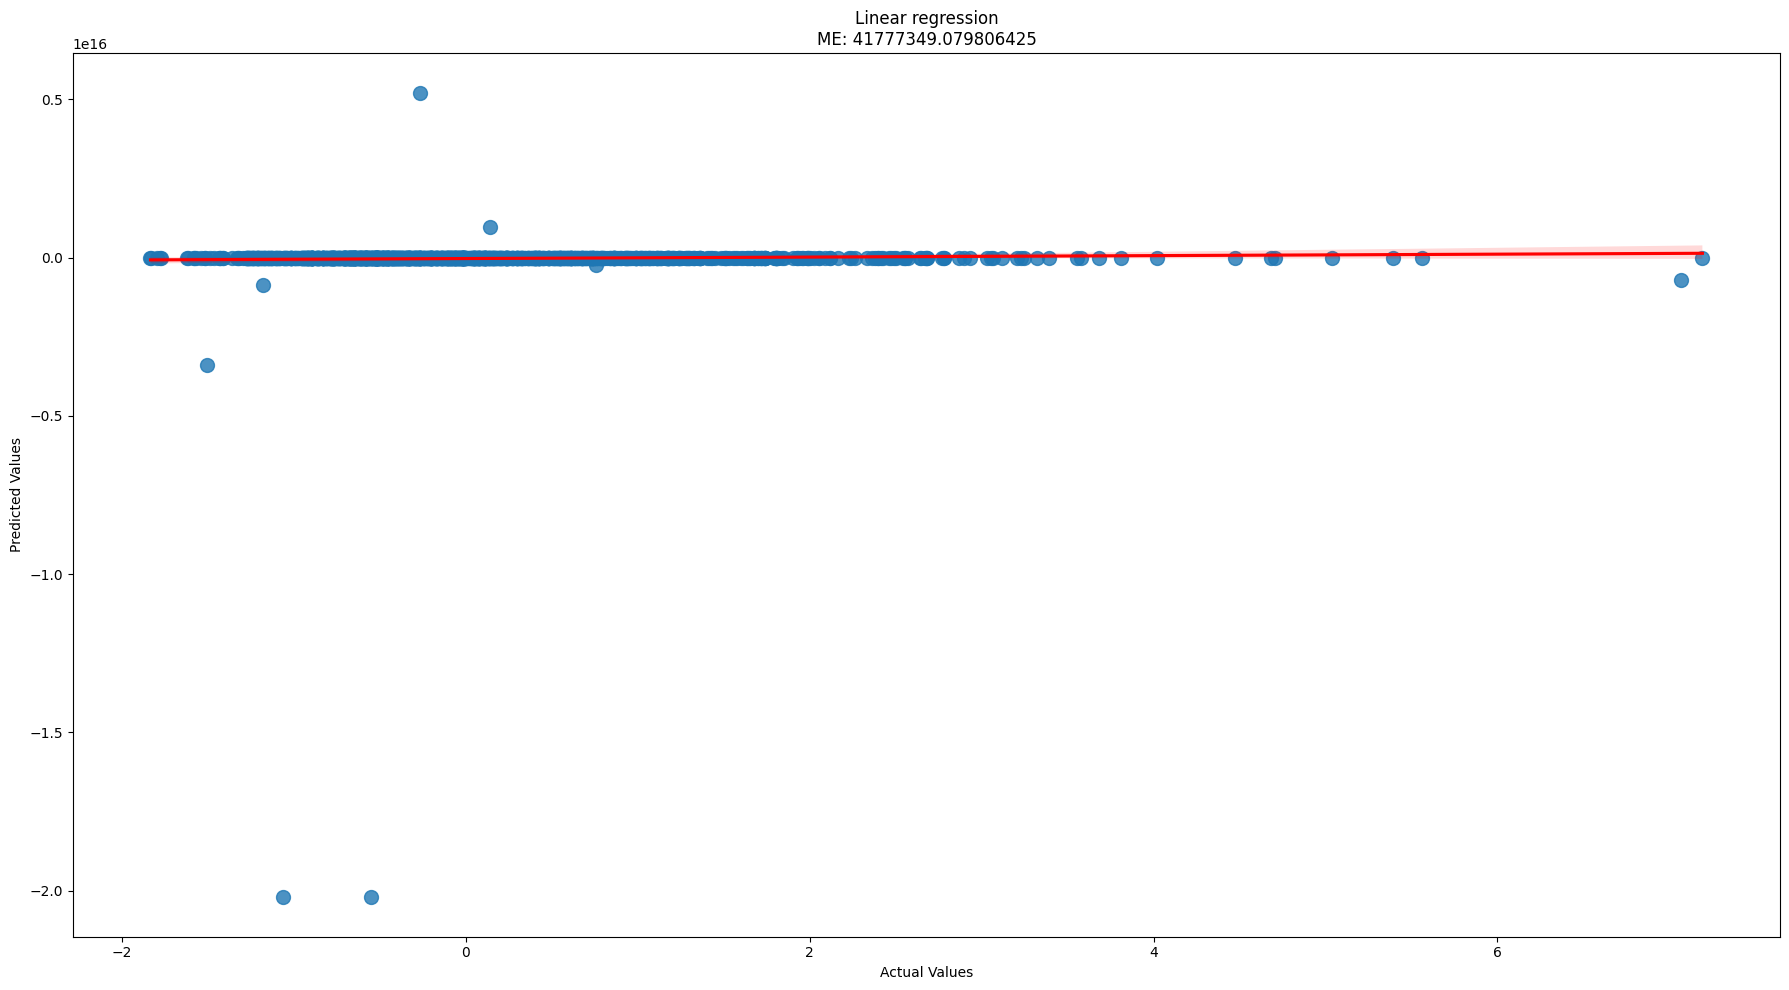

In [517]:
#Graf lineární regrese nad scaled daty
y_pred_all = m_linregscaled.predict(X_scaled) #predikce pro všechna vstupní data bez splitu
print(y_pred_all.shape)
print(X.shape)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax = axes
sns.regplot(x=y_scaled, y=y_pred_all, ax=ax, scatter_kws={'s':100}, line_kws={'color':'red'})
ax.set_title(f'Linear regression\nME: {me}')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

Lasso train score alpha 230: 0.865 test score 0.688 delta 0.177 tr+te 1.553
0.20378344672444915
Lasso
ME: 49185.17
Lasso train score alpha 231: 0.865 test score 0.688 delta 0.177 tr+te 1.553
0.2038087882495738
Lasso
ME: 49186.19
Lasso train score alpha 232: 0.865 test score 0.688 delta 0.177 tr+te 1.553
0.2038346370397327
Lasso
ME: 49187.31
Lasso train score alpha 233: 0.865 test score 0.688 delta 0.177 tr+te 1.553
0.2038609949832243
Lasso
ME: 49188.53
Lasso train score alpha 234: 0.864 test score 0.688 delta 0.176 tr+te 1.552
0.20388786398496384
Lasso
ME: 49189.83
Lasso train score alpha 235: 0.864 test score 0.688 delta 0.176 tr+te 1.552
0.2039155172434815
Lasso
ME: 49191.21


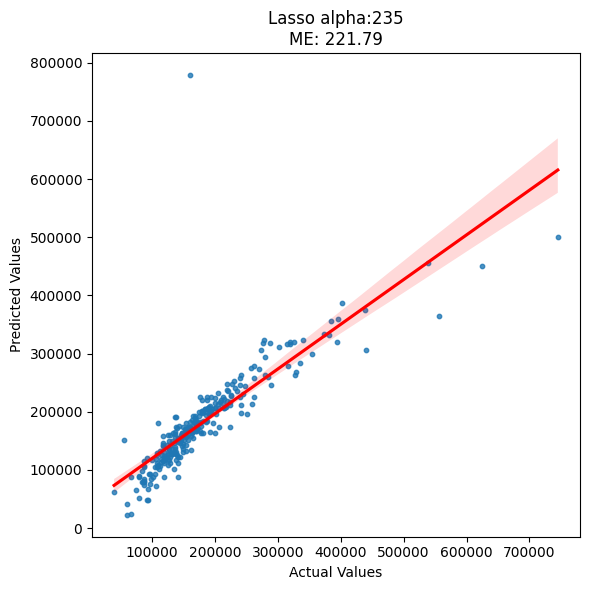

In [181]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for alpha in range(230, 236, 1): #236
  model_lasso = Lasso(alpha)
  model_lasso.fit(X_train, y_train)
  tr = round(model_lasso.score(X_train,y_train), 3)
  te = round(model_lasso.score(X_test, y_test), 3)
  delta = round(tr - te, 3)
  t=round(tr+te, 3)
  print(f"Lasso train score alpha {alpha}: {tr} test score {te} delta {delta} tr+te {t}")


  y_pred = model_lasso.predict(X_test)
  print(root_mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test)))
  print(f'Lasso\nME: {root_mean_squared_error(y_test, y_pred):.2f}')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax = axes
sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws={'s':10}, line_kws={'color':'red'})
ax.set_title(f'Lasso alpha:{alpha}\nME: {np.sqrt(root_mean_squared_error(y_test, y_pred)):.2f}')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()


Ridge train score alpha 1: 0.88 test score 0.636 delta 0.244 tr+te 1.516
0.21171129075018422
Lasso
ME: 53062.94
Ridge train score alpha 3: 0.874 test score 0.669 delta 0.205 tr+te 1.543
0.20611772511525067
Lasso
ME: 50666.10
Ridge train score alpha 5: 0.87 test score 0.679 delta 0.191 tr+te 1.549
0.20524678329591778
Lasso
ME: 49867.77
Ridge train score alpha 7: 0.868 test score 0.683 delta 0.185 tr+te 1.551
0.20570053986922654
Lasso
ME: 49509.21
Ridge train score alpha 9: 0.866 test score 0.686 delta 0.18 tr+te 1.552
0.20666436320163561
Lasso
ME: 49327.15


C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

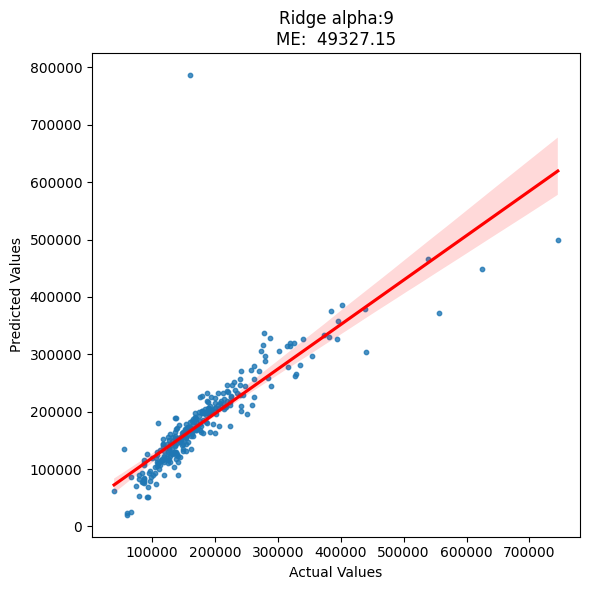

In [182]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for alpha in range(1, 10, 2):
  model_ridge = Ridge(alpha)
  model_ridge.fit(X_train, y_train)
  tr = round(model_ridge.score(X_train,y_train), 3)
  te = round(model_ridge.score(X_test,y_test), 3)
  delta = round(tr - te, 3)
  t=round(tr+te, 3)
  print(f"Ridge train score alpha {alpha}: {tr} test score {te} delta {delta} tr+te {t}")

  y_pred = model_ridge.predict(X_test)
  print(mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test), squared = False))
  print(f'Lasso\nME: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax = axes
sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws={'s':10}, line_kws={'color':'red'})
ax.set_title(f'Ridge alpha:{alpha}\nME:  {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

In [520]:
#Polynomiální regrese se standardním vstupem
from sklearn import config_context
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

for i in range(2, 3):
  poly = PolynomialFeatures(i, include_bias=False)
  with config_context(transform_output="pandas"):
      # výstupem transformace bude Pandas DataFrame
      X_poly = poly.fit_transform(X)
      X_poly_kaggle = poly.fit_transform(X_kaggle)

  scaler = preprocessing.StandardScaler()

  with config_context(transform_output="pandas"):
    X_poly = scaler.fit_transform(X_poly) #standardizace polynomiálních dat 2 stupně
    X_poly_kaggle = scaler.fit_transform(X_kaggle)


  model_poly = LinearRegression()  #pokud se model neinicializuje, může dojít k fitování modelu, který už byl fitovaný v minulosti
  model_poly_all = model_poly.fit(X_poly, y)
  print(f"Polynomie {i} summary score:     ", round(model_poly_all.score(X_poly, y), 2))
  print(f"Polynomie {i} summary intercept: ", round(model_poly_all.intercept_, 2))
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42, shuffle = False) #rozsekneme data, random_state=42,
  model_poly.fit(X_train, y_train)
  print(f"Polynomie {i} train score:       ", round(model_poly.score(X_train, y_train), 2))
  print(f"Polynomie {i} train intercept:   ", round(model_poly.intercept_, 2))
  print(f"Polynomie {i} test score:        ", round(model_poly.score(X_test, y_test), 2))
  print(f"Polynomie {i} test intercept:    ", round(model_poly.intercept_, 2))
  predicted = model_poly.predict(X_test)
  mse = round(mean_squared_error(y_test, predicted), 2)
  me = round(np.sqrt(mse), 2) #odmocněná střední kvadratická chyba
  mae = round(mean_absolute_error(y_test, predicted), 2)
  mape = round(mean_absolute_percentage_error(y_test, predicted), 2) #vážená střední absolutní procentní chyba
  r2 = round(r2_score(y_test, predicted), 2)
  print("Mean Squared Error:            ", mse)
  #print("Mean Log Error:            ", mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test), squared = False))
  print("Mean Error:                    ", me)
  print("Mean Absolute Error:           ", mae)
  print("Mean Absolute Percentage Error:", mape)
  print("R-squared:                     ", r2)
  print("R intercept:                   ", model_poly.intercept_, "\n")

  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
  ax = axes
  sns.regplot(x=y_test, y=predicted, ax=ax, scatter_kws={'s':100}, line_kws={'color':'red'})
  ax.set_title(f'Linear regression {i}\nME: {me}')
  ax.set_xlabel('Actual Values')
  ax.set_ylabel('Predicted Values')
  plt.tight_layout()
  plt.show()

Polynomie 2 summary score:      1.0


TypeError: type numpy.ndarray doesn't define __round__ method

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns

(1402, 1)
(1402, 266)


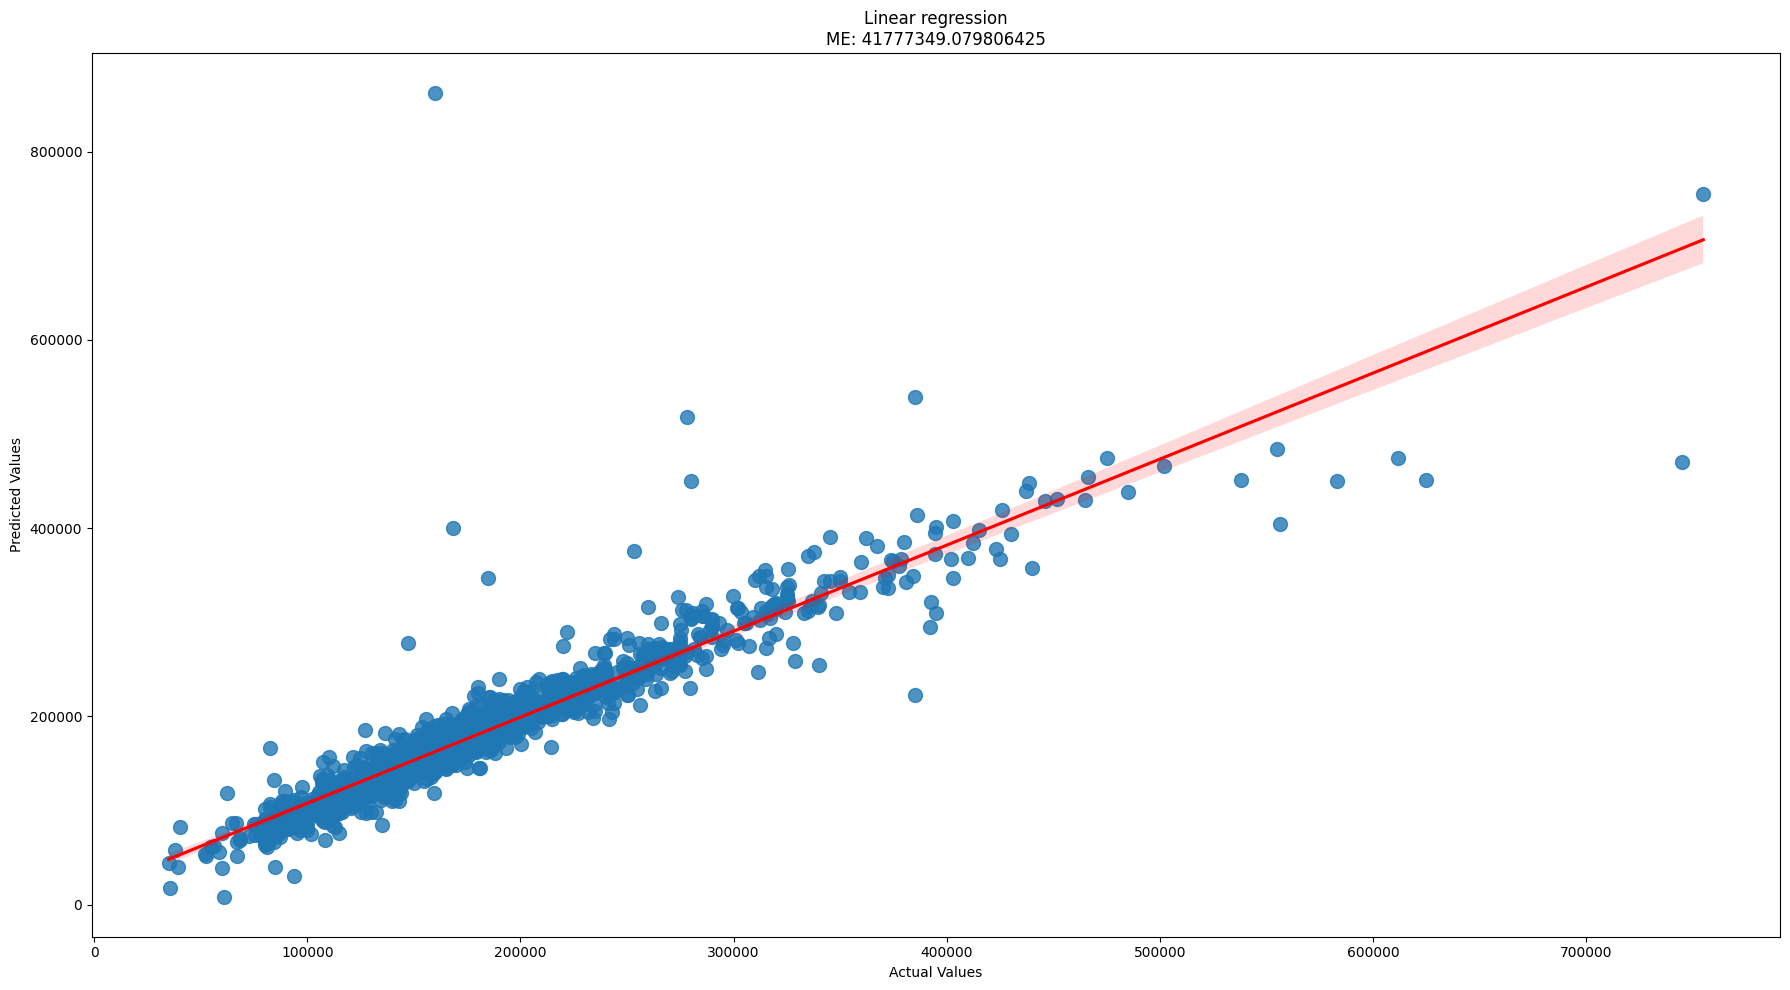

In [522]:
y_pred_all = m_linearreg.predict(X) #predikce pro všechna vstupní data bez splitu
print(y_pred_all.shape)
print(X.shape)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax = axes
sns.regplot(x=y, y=y_pred_all, ax=ax, scatter_kws={'s':100}, line_kws={'color':'red'})
ax.set_title(f'Linear regression\nME: {me}')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

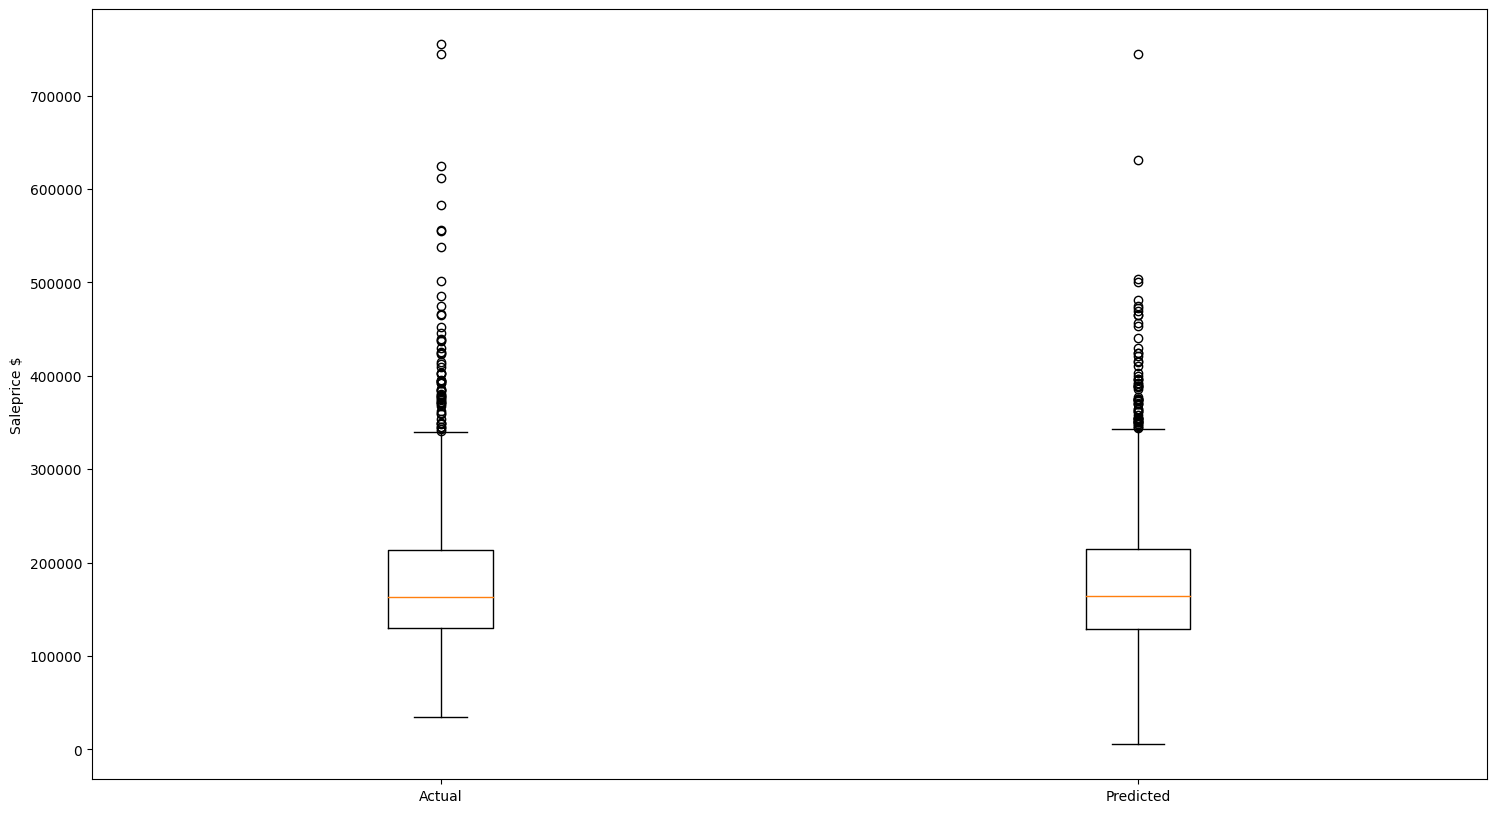

In [23]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.boxplot([y, y_pred_all])
ax.set_xticklabels(['Actual', 'Predicted'])
ax.set_ylabel('Saleprice $')
plt.show()

In [24]:
df_y_pred_all = pd.DataFrame(y_pred_all)
df_y_pred_all.sort_values(0, ascending=False)

,0
1182,745000.000000
691,631372.160973
1169,503533.989922
769,500408.594565
440,480745.743931
...,...
1100,42444.731251
495,38912.961162
533,29573.474746
916,21682.530088


In [25]:
#Outlier?
pd.set_option('display.max_colwidth', None)
table = X.loc[1423,:].to_frame().T
single_line_output = table.to_string(index=False, header=True)
print(single_line_output)

index MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold LotShape_Reg LotShape_Ir1 LotShape_Ir2 LotShape_Ir3 PorchArea_Sum MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM Street_Pave Alley_Grvl Alley_Pave LotShape_IR2 LotShape_IR3 LotShape_Reg LandContour_HLS LandContour_Low LandContour_Lvl Utilities_AllPub Utilities_NoSeWa LotConfig_CulDSac LotConfig_FR2 LotConfig_FR3 LotConfig_Inside LandSlope_Mod LandSlope_Sev Neighborhood_Blueste Neighborhood_BrDale Neighborhood_BrkSide Neighborhood_ClearCr Neighborhood_CollgCr Neighborhood_Crawfor Neighborhood_Edwards Neighborhood_Gilbert Neighborhood_IDOTRR Neighborhood_MeadowV Neighborhood_Mitchel Neighborhood_

# Submission To Kaggle

In [206]:
y_pred = m_linearreg.predict(X_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [566]:
y_pred = model_lasso.predict(X_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [104]:
y_pred = model_ridge.predict(X_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [19]:
y_pred = model_poly.predict(X_poly_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 1stFlrSF 2ndFlrSF
- 1stFlrSF 3SsnPorch
- 1stFlrSF Alley_Grvl
- 1stFlrSF Alley_Pave
- 1stFlrSF BedroomAbvGr
- ...


In [148]:
new_submission.head()

,Id,SalePrice
0,1461,109650.724150
1,1462,131755.371889
2,1463,170323.334860
3,1464,186568.629413
4,1465,212569.394851


In [567]:
new_submission.to_csv("lin_reg_submission.csv", index = False) #aby se netvořil nový index

# Variable importance

In [31]:
errors = []
for var in X_train.columns:
  X_train_drop = X_train.drop([var], axis = 1)
  X_test_drop = X_test.drop([var], axis = 1)
  m = LinearRegression() #zde lze zaměnit model a pak vypozorovat, bez které proměnné roste kvalita predikce, resp. klesá p_value
  m.fit(X_train_drop,y_train)
  y_pred = m.predict(X_test_drop)
  errors.append(mean_squared_error(np.log(np.where(y_pred<=0, np.mean(y_train), y_pred)), np.log(y_test), squared = False)) #ošetření případného záporného logaritmu)

In [34]:
#je to matice jak dobrá je regrese na všech proměnných bez každé jedné proměnné
errors_np = np.array(errors)
print(errors_np)

[0.19656616 0.19389151 0.20115361 1.75470296 0.16797668 0.17180687
 0.1734669  0.23947129 0.18914578 0.20231734 0.20231734 0.20231734
 0.20231734 0.20231734 0.20231734 0.20231734 0.20231734 0.21995368
 0.20280982 0.19178541 0.20550228 0.22477782 0.22316326 0.20396063
 0.1919676  0.1975341  0.22764263 0.19979652 0.18204322 0.20231734
 0.20231734 0.20231734 0.20231734 0.20072029 0.18760119 0.22235622
 0.19130874 0.20231734 0.20231734 0.20231734 0.20231734 0.20231734
 0.22510646 0.20543059 0.22527548 0.24984461 0.26073341 0.20434199
 0.20382081 0.20231734 0.20231734 0.20231734 0.18834799 0.17753382
 0.20233808 0.20231734 0.20231734 0.19541516 0.18670183 0.19889707
 0.19222237 0.22972972 0.15151677 0.20249768 0.20243672 0.23835986
 0.15948978 0.20108041 0.19702373 0.21465566 0.20741333 0.23320101
 0.20431996 0.23314074 0.22168367 0.20773503 0.19977671 0.19098826
 0.22680897 0.23169643 0.20604165 0.20694546 0.20221794 0.19980917
 0.20975237 0.20281285 0.20226878 0.2006705  0.2267347  0.2068

In [42]:
#A výpis s názvy proměnných
df_importance = pd.DataFrame({'var': X_train.columns, 'error': errors_np})
df_importance = df_importance.sort_values('error')
df_importance

,var,error
62,LandSlope_Sev,0.151517
105,BldgType_TwnhsE,0.159244
66,Neighborhood_ClearCr,0.159490
104,BldgType_Twnhs,0.159561
178,BsmtExposure_Av,0.159798
...,...,...
45,MSZoning_RM,0.249845
181,BsmtExposure_No,0.254900
46,Street_Pave,0.260733
180,BsmtExposure_Mn,0.283204


In [ ]:
m = LinearRegression()
m.fit(X_train,y_train)
y_pred = m.predict(X_test)
mean_squared_error(np.log(y_pred), np.log(y_test), squared = False)

In [ ]:
np.where(errors_np<0.21,X_train.columns,"_")

In [ ]:
np.where(errors_np>0.21,X_train.columns,"")

In [ ]:
X_train.BedroomAbvGr.value_counts()

##Forward Selection

In [ ]:
#Postupně s jednou proměnnou identifikovat chybovosti - cyklus, identifikace proměnné, která pro decission tree je nejlepší